# Dijakstra's algorithm

In [13]:
import heapq
import random
import timeit

def dijkstra(graph, source):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[source] = 0
    priority_queue = [(0, source)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances


# Bellman Ford algorithm

In [14]:
def bellman_ford(graph, source):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[source] = 0

    for _ in range(len(graph) - 1):
        for vertex in graph:
            for neighbor, weight in graph[vertex].items():
                if distances[vertex] + weight < distances[neighbor]:
                    distances[neighbor] = distances[vertex] + weight

    # Check for negative weight cycles
    for vertex in graph:
        for neighbor, weight in graph[vertex].items():
            if distances[vertex] + weight < distances[neighbor]:
                raise ValueError("Graph contains a negative weight cycle")

    return distances


In [11]:
def generate_random_graph(num_vertices, edge_probability, min_weight, max_weight):
    graph = {i: {} for i in range(num_vertices)}
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < edge_probability:
                weight = random.randint(min_weight, max_weight)
                graph[i][j] = weight
                graph[j][i] = weight
    return graph

if __name__ == "__main__":
    num_vertices = 100
    edge_probability = 0.3
    min_weight = 1
    max_weight = 10

    graph = generate_random_graph(num_vertices, edge_probability, min_weight, max_weight)
    source_vertex = random.randint(0, num_vertices - 1)

    dijkstra_time = timeit.timeit(lambda: dijkstra(graph, source_vertex), number=10)
    bellman_ford_time = timeit.timeit(lambda: bellman_ford(graph, source_vertex), number=10)

    print("Dijkstra's Algorithm Runtime:", dijkstra_time)
    print("Bellman-Ford's Algorithm Runtime:", bellman_ford_time)

Dijkstra's Algorithm Runtime: 0.00563889998011291
Bellman-Ford's Algorithm Runtime: 0.3880570998881012


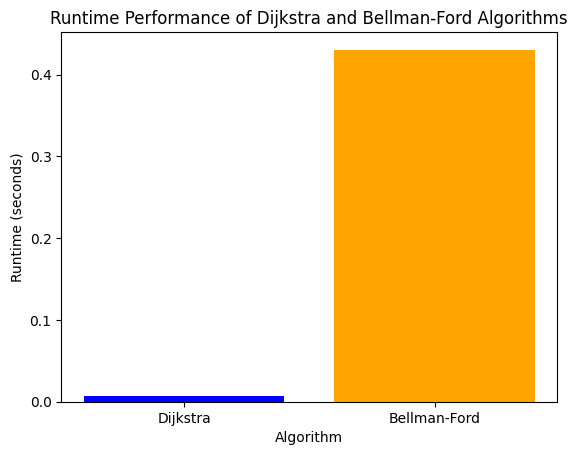

In [15]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    num_vertices = 100
    edge_probability = 0.3
    min_weight = 1
    max_weight = 10

    graph = generate_random_graph(num_vertices, edge_probability, min_weight, max_weight)
    source_vertex = random.randint(0, num_vertices - 1)

    dijkstra_time = timeit.timeit(lambda: dijkstra(graph, source_vertex), number=10)
    bellman_ford_time = timeit.timeit(lambda: bellman_ford(graph, source_vertex), number=10)

    algorithms = ['Dijkstra', 'Bellman-Ford']
    runtimes = [dijkstra_time, bellman_ford_time]

    plt.bar(algorithms, runtimes, color=['blue', 'orange'])
    plt.xlabel('Algorithm')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime Performance of Dijkstra and Bellman-Ford Algorithms')
    plt.show()
